In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import IPython
from IPython.display import Audio
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download uwrfkaggler/ravdess-emotional-song-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-song-audio
License(s): CC-BY-NC-SA-4.0
100% 455M/456M [00:24<00:00, 21.9MB/s]
100% 456M/456M [00:24<00:00, 19.8MB/s]


In [7]:
! unzip /content/ravdess-emotional-song-audio.zip

Archive:  /content/ravdess-emotional-song-audio.zip
  inflating: Actor_01/03-02-01-01-01-01-01.wav  
  inflating: Actor_01/03-02-01-01-01-02-01.wav  
  inflating: Actor_01/03-02-01-01-02-01-01.wav  
  inflating: Actor_01/03-02-01-01-02-02-01.wav  
  inflating: Actor_01/03-02-02-01-01-01-01.wav  
  inflating: Actor_01/03-02-02-01-01-02-01.wav  
  inflating: Actor_01/03-02-02-01-02-01-01.wav  
  inflating: Actor_01/03-02-02-01-02-02-01.wav  
  inflating: Actor_01/03-02-02-02-01-01-01.wav  
  inflating: Actor_01/03-02-02-02-01-02-01.wav  
  inflating: Actor_01/03-02-02-02-02-01-01.wav  
  inflating: Actor_01/03-02-02-02-02-02-01.wav  
  inflating: Actor_01/03-02-03-01-01-01-01.wav  
  inflating: Actor_01/03-02-03-01-01-02-01.wav  
  inflating: Actor_01/03-02-03-01-02-01-01.wav  
  inflating: Actor_01/03-02-03-01-02-02-01.wav  
  inflating: Actor_01/03-02-03-02-01-01-01.wav  
  inflating: Actor_01/03-02-03-02-01-02-01.wav  
  inflating: Actor_01/03-02-03-02-02-01-01.wav  
  inflating: Acto

In [2]:

import os
import pandas as pd

# Constants
EMOTIONS = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 0: 'surprise'}
DATA_PATH = '/content'
SAMPLE_RATE = 48000

# Initialize an empty DataFrame
data = pd.DataFrame(columns=['Emotion', 'Emotion intensity', 'Gender', 'Path'])

# Walk through the dataset directory
for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        # Ensure the file is valid (e.g., skip hidden/system files)
        if filename.endswith('.wav'):  # Assuming you're working with .wav files
            file_path = os.path.join(dirname, filename)
            identifiers = filename.split('.')[0].split('-')

            # Ensure there are enough parts in identifiers
            if len(identifiers) >= 7:
                emotion = int(identifiers[2])
                if emotion == 8:
                    emotion = 0  # Convert 8 to 0 (for surprise)

                # Intensity and gender extraction
                emotion_intensity = 'normal' if int(identifiers[3]) == 1 else 'strong'
                gender = 'female' if int(identifiers[6]) % 2 == 0 else 'male'

                # Add new row to the DataFrame
                new_row = pd.DataFrame({
                    "Emotion": [emotion],
                    "Emotion intensity": [emotion_intensity],
                    "Gender": [gender],
                    "Path": [file_path]
                })
                data = pd.concat([data, new_row], ignore_index=True)

# Print the DataFrame
print(data)


     Emotion Emotion intensity  Gender  \
0          4            strong  female   
1          1            normal  female   
2          4            normal  female   
3          6            normal  female   
4          2            normal  female   
...      ...               ...     ...   
1931       5            strong  female   
1932       6            strong  female   
1933       4            strong  female   
1934       1            normal  female   
1935       6            normal  female   

                                            Path  
0     /content/Actor_10/03-02-04-02-01-01-10.wav  
1     /content/Actor_10/03-02-01-01-01-01-10.wav  
2     /content/Actor_10/03-02-04-01-01-02-10.wav  
3     /content/Actor_10/03-02-06-01-01-02-10.wav  
4     /content/Actor_10/03-02-02-01-01-01-10.wav  
...                                          ...  
1931  /content/Actor_06/03-02-05-02-01-02-06.wav  
1932  /content/Actor_06/03-02-06-02-02-01-06.wav  
1933  /content/Actor_06/03-02-04-02-

In [3]:
print("number of files is {}".format(len(data)))
data.head()

number of files is 1936


,Emotion,Emotion intensity,Gender,Path
0,4,strong,female,/content/Actor_10/03-02-04-02-01-01-10.wav
1,1,normal,female,/content/Actor_10/03-02-01-01-01-01-10.wav
2,4,normal,female,/content/Actor_10/03-02-04-01-01-02-10.wav
3,6,normal,female,/content/Actor_10/03-02-06-01-01-02-10.wav
4,2,normal,female,/content/Actor_10/03-02-02-01-01-01-10.wav


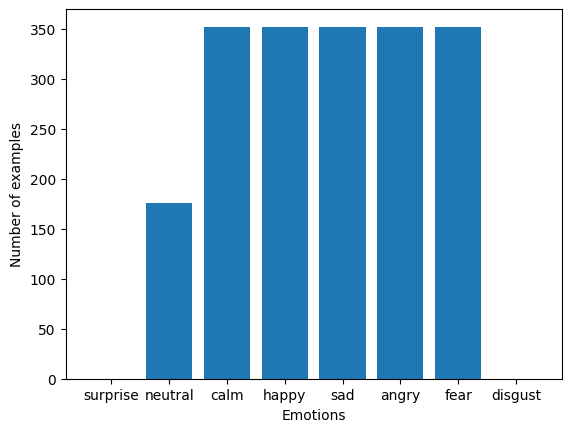

In [4]:
import matplotlib.pyplot as plt

# Reindex value_counts() to ensure all 8 emotions are represented, filling missing ones with 0
emotion_counts = data['Emotion'].value_counts().reindex(range(8), fill_value=0)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111)

# Corrected: x=range(8), height=emotion_counts to match lengths
ax.bar(x=range(8), height=emotion_counts)

# Set x-axis tick labels
ax.set_xticks(ticks=range(8))
ax.set_xticklabels([EMOTIONS[i] for i in range(8)], fontsize=10)

# Labels
ax.set_xlabel('Emotions')
ax.set_ylabel('Number of examples')

# Show the plot
plt.show()


Text(0, 0.5, 'Number of examples')

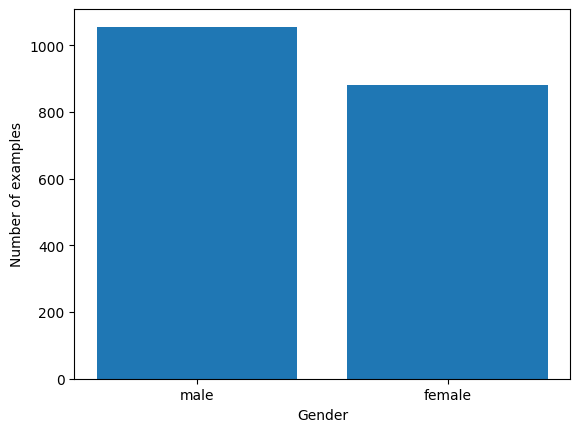

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
counts = data['Gender'].value_counts()
ax.bar(x=[0,1], height=counts.values)
ax.set_xticks(ticks=[0,1])
ax.set_xticklabels(list(counts.index))
ax.set_xlabel('Gender')
ax.set_ylabel('Number of examples')

Text(0, 0.5, 'Number of examples')

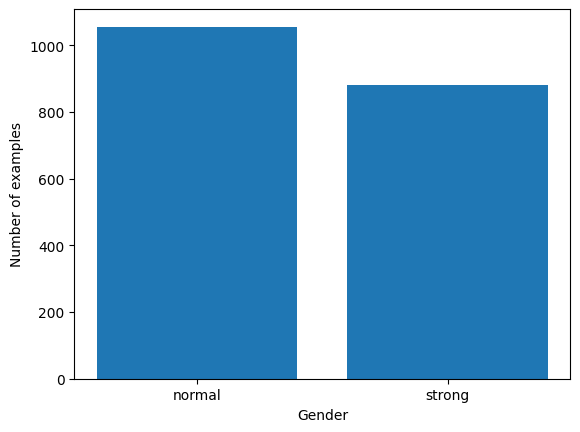

In [6]:

fig = plt.figure()
ax = fig.add_subplot(111)
counts = data['Emotion intensity'].value_counts()
ax.bar(x=[0,1], height=counts.values)
ax.set_xticks(ticks=[0,1])
ax.set_xticklabels(list(counts.index))
ax.set_xlabel('Gender')
ax.set_ylabel('Number of examples')

In [7]:
# Preallocate memory for signals based on the number of files and expected signal size
num_files = len(data)
signal_length = int(SAMPLE_RATE * 3)  # 3 seconds of audio at the given sample rate
signals = np.zeros((num_files, signal_length))  # Preallocate array for all signals

# Loop through each file and process audio
for i, file_path in enumerate(data.Path):
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, duration=3, offset=0.5, sr=SAMPLE_RATE)

    # Zero-pad or trim the signal to the desired length
    if len(audio) < signal_length:
        # If the audio is shorter, pad with zeros
        padded_signal = np.pad(audio, (0, signal_length - len(audio)), mode='constant')
    else:
        # If the audio is longer, trim it
        padded_signal = audio[:signal_length]

    # Store the padded signal in the preallocated array
    signals[i] = padded_signal

    # Update progress every 100 files
    if (i + 1) % 100 == 0 or i == num_files - 1:
        print(f"\rProcessed {i + 1}/{num_files} files", end='')

# Print final status
print("\nAll files processed successfully.")


Processed 1936/1936 files
All files processed successfully.


In [8]:
import numpy as np
import gc  # For garbage collection to free memory

X = signals  # Assuming this is your data matrix
train_ind, test_ind, val_ind = [], [], []
X_train, X_val, X_test = [], [], []
Y_train, Y_val, Y_test = [], [], []

# Function to split data and clear memory in batches
def process_emotion_data(emotion, X, data):
    # Get indices for the current emotion
    emotion_ind = list(data.loc[data.Emotion == emotion, 'Emotion'].index)
    emotion_ind = np.array(emotion_ind, dtype=int)  # Ensure indices are integers
    emotion_ind = np.random.permutation(emotion_ind)  # Shuffle indices

    m = len(emotion_ind)
    # Split the data into train, validation, and test sets (80%, 10%, 10%)
    ind_train = emotion_ind[:int(0.8 * m)]
    ind_val = emotion_ind[int(0.8 * m):int(0.9 * m)]
    ind_test = emotion_ind[int(0.9 * m):]

    # Append the training, validation, and test data
    X_train.append(X[ind_train, :])
    Y_train.append(np.array([emotion] * len(ind_train), dtype=np.int32))
    X_val.append(X[ind_val, :])
    Y_val.append(np.array([emotion] * len(ind_val), dtype=np.int32))
    X_test.append(X[ind_test, :])
    Y_test.append(np.array([emotion] * len(ind_test), dtype=np.int32))

    # Save indices
    train_ind.append(ind_train)
    test_ind.append(ind_test)
    val_ind.append(ind_val)

    # Free up memory after processing each emotion
    gc.collect()

# Loop through each emotion and process in batches
for emotion in range(len(EMOTIONS)):
    process_emotion_data(emotion, X, data)
    print(f"Processed emotion {emotion}/{len(EMOTIONS)}")

# Concatenate all training, validation, and test data
X_train = np.concatenate(X_train, axis=0)
X_val = np.concatenate(X_val, axis=0)
X_test = np.concatenate(X_test, axis=0)
Y_train = np.concatenate(Y_train, axis=0)
Y_val = np.concatenate(Y_val, axis=0)
Y_test = np.concatenate(Y_test, axis=0)
train_ind = np.concatenate(train_ind, axis=0)
val_ind = np.concatenate(val_ind, axis=0)
test_ind = np.concatenate(test_ind, axis=0)

# Print the shapes of the datasets
print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'X_val: {X_val.shape}, Y_val: {Y_val.shape}')
print(f'X_test: {X_test.shape}, Y_test: {Y_test.shape}')

# Check if all indices are unique
unique, count = np.unique(np.concatenate([train_ind, test_ind, val_ind], axis=0), return_counts=True)
print(f"Number of unique indexes is {sum(count == 1)}, out of {X.shape[0]}")

# Free memory again after the whole process
gc.collect()


Processed emotion 0/8
Processed emotion 1/8
Processed emotion 2/8
Processed emotion 3/8
Processed emotion 4/8
Processed emotion 5/8
Processed emotion 6/8
Processed emotion 7/8
X_train: (1545, 144000), Y_train: (1545,)
X_val: (193, 144000), Y_val: (193,)
X_test: (198, 144000), Y_test: (198,)
Number of unique indexes is 1936, out of 1936


0

In [9]:
def addAWGN(signal, num_bits=16, snr_low=15, snr_high=30):
    signal_len = len(signal)
    norm_constant = 2.0 ** (num_bits - 1)
    signal_norm = signal / norm_constant
    s_power = np.sum(signal_norm ** 2) / signal_len

    # Generate one noise sample
    noise = np.random.normal(size=signal_len)
    noise_norm = noise / norm_constant
    n_power = np.sum(noise_norm ** 2) / signal_len

    # Random SNR: Uniform [snr_low, snr_high] in dB
    target_snr = np.random.randint(snr_low, snr_high)

    # Compute K (scaling factor)
    K = np.sqrt((s_power / n_power) * 10 ** (-target_snr / 10))

    # Generate one noisy signal
    noisy_signal = signal + K * noise

    return noisy_signal





In [10]:
aug_signals = []
aug_labels = []
batch_size = 100  # Define a batch size

for i in range(X_train.shape[0]):
    signal = X_train[i, :]

    # Generate a single augmented signal
    noisy_signal = addAWGN(signal)

    # Append the noisy signal and corresponding label
    aug_signals.append(noisy_signal)
    aug_labels.append(Y_train[i])

    # Display progress every 'batch_size' samples
    if (i + 1) % batch_size == 0 or i == X_train.shape[0] - 1:
        print(f"\rProcessed {i + 1}/{X_train.shape[0]} files", end='')

# Convert to numpy arrays
aug_signals = np.array(aug_signals)  # Convert the augmented signals to a NumPy array
aug_labels = np.array(aug_labels)  # Convert augmented labels to NumPy array

# Update the training set with the augmented data
X_train = np.concatenate([X_train, aug_signals], axis=0)
Y_train = np.concatenate([Y_train, aug_labels])

# Print final shape of the training data
print('')
print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}')




Processed 1545/1545 files
X_train: (3090, 144000), Y_train: (3090,)


MEL spectrogram shape:  (128, 563)


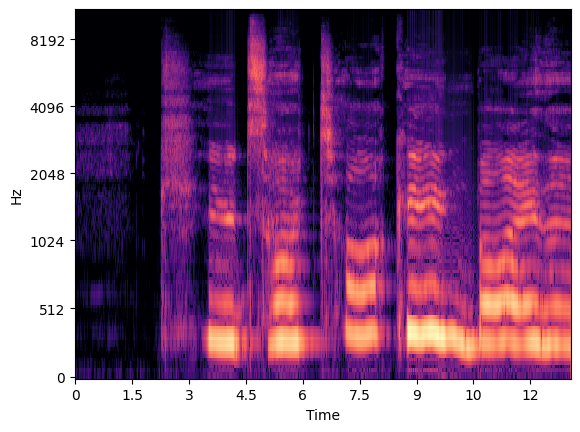

In [11]:
def getMELspectrogram(audio, sample_rate):
    mel_spec = librosa.feature.melspectrogram(y=audio,
                                              sr=sample_rate,
                                              n_fft=1024,
                                              win_length = 512,
                                              window='hamming',
                                              hop_length = 256,
                                              n_mels=128,
                                              fmax=sample_rate/2
                                             )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# test function
audio, sample_rate = librosa.load(data.loc[0,'Path'], duration=3, offset=0.5,sr=SAMPLE_RATE)
signal = np.zeros((int(SAMPLE_RATE*3,)))
signal[:len(audio)] = audio
mel_spectrogram = getMELspectrogram(signal, SAMPLE_RATE)
librosa.display.specshow(mel_spectrogram, y_axis='mel', x_axis='time')
print('MEL spectrogram shape: ',mel_spectrogram.shape)

In [12]:
mel_train = []
print("Calculatin mel spectrograms for train set")
for i in range(X_train.shape[0]):
    mel_spectrogram = getMELspectrogram(X_train[i,:], sample_rate=SAMPLE_RATE)
    mel_train.append(mel_spectrogram)
    print("\r Processed {}/{} files".format(i,X_train.shape[0]),end='')
print('')
mel_train = np.stack(mel_train,axis=0)
del X_train
X_train = mel_train

mel_val = []
print("Calculatin mel spectrograms for val set")
for i in range(X_val.shape[0]):
    mel_spectrogram = getMELspectrogram(X_val[i,:], sample_rate=SAMPLE_RATE)
    mel_val.append(mel_spectrogram)
    print("\r Processed {}/{} files".format(i,X_val.shape[0]),end='')
print('')
mel_val = np.stack(mel_val,axis=0)
del X_val
X_val = mel_val
mel_test = []
print("Calculatin mel spectrograms for test set")
for i in range(X_test.shape[0]):
    mel_spectrogram = getMELspectrogram(X_test[i,:], sample_rate=SAMPLE_RATE)
    mel_test.append(mel_spectrogram)
    print("\r Processed {}/{} files".format(i,X_test.shape[0]),end='')
print('')
mel_test = np.stack(mel_test,axis=0)
del X_test
X_test = mel_test

print(f'X_train:{X_train.shape}, Y_train:{Y_train.shape}')
print(f'X_val:{X_val.shape}, Y_val:{Y_val.shape}')
print(f'X_test:{X_test.shape}, Y_test:{Y_test.shape}')

Calculatin mel spectrograms for train set
 Processed 3089/3090 files
Calculatin mel spectrograms for val set
 Processed 192/193 files
Calculatin mel spectrograms for test set
 Processed 197/198 files
X_train:(3090, 128, 563), Y_train:(3090,)
X_val:(193, 128, 563), Y_val:(193,)
X_test:(198, 128, 563), Y_test:(198,)


In [13]:
import torch
import torch.nn as nn

class ParallelModel(nn.Module):
    def __init__(self,num_emotions):
        super().__init__()
        # conv block
        self.conv2Dblock = nn.Sequential(
            # 1. conv block
            nn.Conv2d(in_channels=1,
                       out_channels=16,
                       kernel_size=3,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.3),
            # 2. conv block
            nn.Conv2d(in_channels=16,
                       out_channels=32,
                       kernel_size=3,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.3),
            # 3. conv block
            nn.Conv2d(in_channels=32,
                       out_channels=64,
                       kernel_size=3,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.3),
            # 4. conv block
            nn.Conv2d(in_channels=64,
                       out_channels=64,
                       kernel_size=3,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.3)
        )
        # LSTM block
        self.lstm_maxpool = nn.MaxPool2d(kernel_size=[2,4], stride=[2,4])
        hidden_size = 128
        self.lstm = nn.LSTM(input_size=64,hidden_size=hidden_size,bidirectional=True, batch_first=True)
        self.dropout_lstm = nn.Dropout(0.1)
        self.attention_linear = nn.Linear(2*hidden_size,1) # 2*hidden_size for the 2 outputs of bidir LSTM
        # Linear softmax layer
        self.out_linear = nn.Linear(2*hidden_size+256,num_emotions)
        self.dropout_linear = nn.Dropout(p=0)
        self.out_softmax = nn.Softmax(dim=1)
    def forward(self,x):
        # conv embedding
        conv_embedding = self.conv2Dblock(x) #(b,channel,freq,time)
        conv_embedding = torch.flatten(conv_embedding, start_dim=1) # do not flatten batch dimension
        # lstm embedding
        x_reduced = self.lstm_maxpool(x)
        x_reduced = torch.squeeze(x_reduced,1)
        x_reduced = x_reduced.permute(0,2,1) # (b,t,freq)
        lstm_embedding, (h,c) = self.lstm(x_reduced) # (b, time, hidden_size*2)
        lstm_embedding = self.dropout_lstm(lstm_embedding)
        batch_size,T,_ = lstm_embedding.shape
        attention_weights = [None]*T
        for t in range(T):
            embedding = lstm_embedding[:,t,:]
            attention_weights[t] = self.attention_linear(embedding)
        attention_weights_norm = nn.functional.softmax(torch.stack(attention_weights,-1),-1)
        attention = torch.bmm(attention_weights_norm,lstm_embedding) # (Bx1xT)*(B,T,hidden_size*2)=(B,1,2*hidden_size)
        attention = torch.squeeze(attention, 1)
        # concatenate
        complete_embedding = torch.cat([conv_embedding, attention], dim=1)

        output_logits = self.out_linear(complete_embedding)
        output_logits = self.dropout_linear(output_logits)
        output_softmax = self.out_softmax(output_logits)
        return output_logits, output_softmax, attention_weights_norm

In [14]:
def loss_fnc(predictions, targets):
    return nn.CrossEntropyLoss()(input=predictions,target=targets)

In [15]:
def make_train_step(model, loss_fnc, optimizer):
    def train_step(X,Y):
        # set model to train mode
        model.train()
        # forward pass
        output_logits, output_softmax, attention_weights_norm = model(X)
        predictions = torch.argmax(output_softmax,dim=1)
        accuracy = torch.sum(Y==predictions)/float(len(Y))
        # compute loss
        loss = loss_fnc(output_logits, Y)
        # compute gradients
        loss.backward()
        # update parameters and zero gradients
        optimizer.step()
        optimizer.zero_grad()
        return loss.item(), accuracy*100
    return train_step

In [16]:
def make_validate_fnc(model,loss_fnc):
    def validate(X,Y):
        with torch.no_grad():
            model.eval()
            output_logits, output_softmax, attention_weights_norm = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            loss = loss_fnc(output_logits,Y)
        return loss.item(), accuracy*100, predictions
    return validate

In [17]:
from sklearn.preprocessing import StandardScaler

X_train = np.expand_dims(X_train,1)
X_val = np.expand_dims(X_val,1)
X_test = np.expand_dims(X_test,1)

scaler = StandardScaler()

b,c,h,w = X_train.shape
X_train = np.reshape(X_train, newshape=(b,-1))
X_train = scaler.fit_transform(X_train)
X_train = np.reshape(X_train, newshape=(b,c,h,w))

b,c,h,w = X_test.shape
X_test = np.reshape(X_test, newshape=(b,-1))
X_test = scaler.transform(X_test)
X_test = np.reshape(X_test, newshape=(b,c,h,w))

b,c,h,w = X_val.shape
X_val = np.reshape(X_val, newshape=(b,-1))
X_val = scaler.transform(X_val)
X_val = np.reshape(X_val, newshape=(b,c,h,w))

In [18]:
EPOCHS=100
DATASET_SIZE = X_train.shape[0]
BATCH_SIZE = 32
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Selected device is {}'.format(device))
model = ParallelModel(num_emotions=len(EMOTIONS)).to(device)
print('Number of trainable params: ',sum(p.numel() for p in model.parameters()) )
OPTIMIZER = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=1e-3, momentum=0.8)

train_step = make_train_step(model, loss_fnc, optimizer=OPTIMIZER)
validate = make_validate_fnc(model,loss_fnc)
losses=[]
val_losses = []
for epoch in range(EPOCHS):
    # schuffle data
    ind = np.random.permutation(DATASET_SIZE)
    X_train = X_train[ind,:,:,:]
    Y_train = Y_train[ind]
    epoch_acc = 0
    epoch_loss = 0
    iters = int(DATASET_SIZE / BATCH_SIZE)
    for i in range(iters):
        batch_start = i * BATCH_SIZE
        batch_end = min(batch_start + BATCH_SIZE, DATASET_SIZE)
        actual_batch_size = batch_end-batch_start
        X = X_train[batch_start:batch_end,:,:,:]
        Y = Y_train[batch_start:batch_end]
        X_tensor = torch.tensor(X,device=device).float()
        Y_tensor = torch.tensor(Y, dtype=torch.long,device=device)
        loss, acc = train_step(X_tensor,Y_tensor)
        epoch_acc += acc*actual_batch_size/DATASET_SIZE
        epoch_loss += loss*actual_batch_size/DATASET_SIZE
        print(f"\r Epoch {epoch}: iteration {i}/{iters}",end='')
    X_val_tensor = torch.tensor(X_val,device=device).float()
    Y_val_tensor = torch.tensor(Y_val,dtype=torch.long,device=device)
    val_loss, val_acc, _ = validate(X_val_tensor,Y_val_tensor)
    losses.append(epoch_loss)
    val_losses.append(val_loss)
    print('')
    print(f"Epoch {epoch} --> loss:{epoch_loss:.4f}, acc:{epoch_acc:.2f}%, val_loss:{val_loss:.4f}, val_acc:{val_acc:.2f}%")

Selected device is cuda
Number of trainable params:  263593
 Epoch 0: iteration 95/96
Epoch 0 --> loss:1.9402, acc:24.72%, val_loss:2.0772, val_acc:12.44%
 Epoch 1: iteration 95/96
Epoch 1 --> loss:1.6297, acc:34.27%, val_loss:1.8357, val_acc:24.87%
 Epoch 2: iteration 95/96
Epoch 2 --> loss:1.5047, acc:38.45%, val_loss:1.6248, val_acc:36.79%
 Epoch 3: iteration 95/96
Epoch 3 --> loss:1.3612, acc:45.11%, val_loss:1.9052, val_acc:23.83%
 Epoch 4: iteration 95/96
Epoch 4 --> loss:1.2866, acc:47.35%, val_loss:1.6456, val_acc:27.46%
 Epoch 5: iteration 95/96
Epoch 5 --> loss:1.2357, acc:48.51%, val_loss:1.5161, val_acc:37.31%
 Epoch 6: iteration 95/96
Epoch 6 --> loss:1.1508, acc:53.04%, val_loss:1.2586, val_acc:49.74%
 Epoch 7: iteration 95/96
Epoch 7 --> loss:1.1459, acc:53.40%, val_loss:1.3895, val_acc:46.63%
 Epoch 8: iteration 95/96
Epoch 8 --> loss:1.0947, acc:55.50%, val_loss:1.2814, val_acc:52.85%
 Epoch 9: iteration 95/96
Epoch 9 --> loss:1.0452, acc:57.41%, val_loss:1.1424, val_a

In [23]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
SAVE_PATH = '/content/drive/MyDrive/models'  # Change this path as needed
os.makedirs(SAVE_PATH, exist_ok=True)
torch.save(model.state_dict(), os.path.join(SAVE_PATH, 'cnn_lstm_parallel_model.pt'))
print('Model is saved to {}'.format(os.path.join(SAVE_PATH, 'cnn_lstm_parallel_model.pt')))


Model is saved to /content/drive/MyDrive/models/cnn_lstm_parallel_model.pt


In [25]:
import os
import torch

LOAD_PATH = '/content/drive/MyDrive/models'  # Adjust the path based on where you saved your model
model = ParallelModel(len(EMOTIONS))  # Initialize your model
model.load_state_dict(torch.load(os.path.join(LOAD_PATH, 'cnn_lstm_parallel_model.pt')))
print('Model is loaded from {}'.format(os.path.join(LOAD_PATH, 'cnn_lstm_parallel_model.pt')))


<ipython-input-25-a2470a46ba98>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(LOAD_PATH, 'cnn_lstm_parallel_model.pt')))


Model is loaded from /content/drive/MyDrive/models/cnn_lstm_parallel_model.pt


In [26]:
import torch
import sklearn.metrics as metrics

X_test_tensor = torch.tensor(X_test, device=device).float()
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long, device=device)
test_loss, test_acc, predictions = validate(X_test_tensor, Y_test_tensor)

if isinstance(predictions, torch.Tensor):
    predictions = predictions.cpu().numpy()

true_labels = Y_test_tensor.cpu().numpy()

recall = metrics.recall_score(true_labels, predictions, average='weighted')
f1 = metrics.f1_score(true_labels, predictions, average='weighted')

print(f'Test loss is {test_loss:.3f}')
print(f'Test accuracy is {test_acc:.2f}%')
print(f'Test recall is {recall:.2f}')
print(f'Test F1 score is {f1:.2f}')

Test loss is 0.120
Test accuracy is 95.96%
Test recall is 0.96
Test F1 score is 0.96


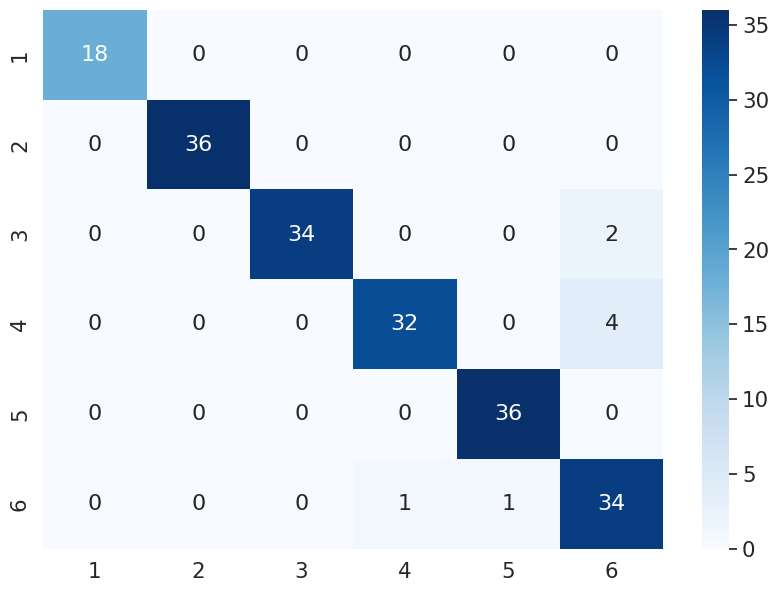

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure predictions is a numpy array
if isinstance(predictions, torch.Tensor):
    predictions = predictions.detach().cpu().numpy()

# Calculate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Get unique classes
unique_classes = np.unique(np.concatenate((Y_test, predictions)))

# Filter EMOTIONS to include only present classes
filtered_emotions = [emotion for emotion in EMOTIONS if emotion in unique_classes]

# Create DataFrame for heatmap
df_cm = pd.DataFrame(cm, index=filtered_emotions, columns=filtered_emotions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues')
plt.show()


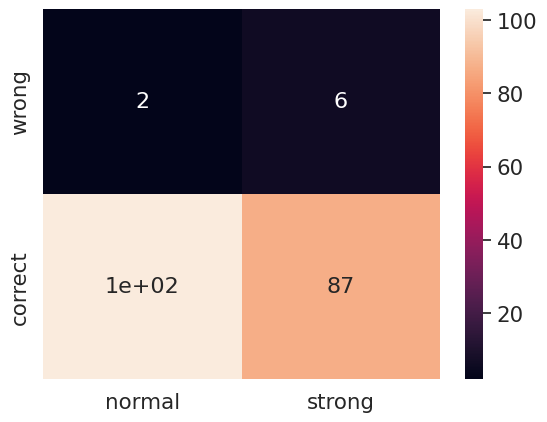

In [30]:
correct_strong = 0
correct_normal = 0
wrong_strong = 0
wrong_normal = 0
for i in range(len(X_test)):
    intensity = data.loc[test_ind[i],'Emotion intensity']
    if Y_test[i] == predictions[i]:
        if  intensity == 'normal':
            correct_normal += 1
        else:
            correct_strong += 1
    else: # wrong prediction
        if intensity == 'normal':
            wrong_normal += 1
        else:
            wrong_strong += 1
array = np.array([[wrong_normal,wrong_strong],[correct_normal,correct_strong]])
df = pd.DataFrame(array,['wrong','correct'],['normal','strong'])
sn.set(font_scale=1.4) # for label size
sn.heatmap(df, annot=True, annot_kws={"size": 16})
plt.show()


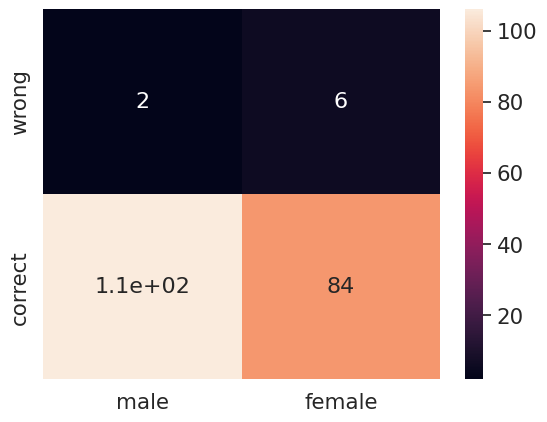

In [31]:
correct_male = 0
correct_female = 0
wrong_male = 0
wrong_female = 0
for i in range(len(X_test)):
    gender = data.loc[test_ind[i],'Gender']
    if Y_test[i] == predictions[i]:
        if  gender == 'male':
            correct_male += 1
        else:
            correct_female += 1
    else: # wrong prediction
        if gender == 'male':
            wrong_male += 1
        else:
            wrong_female += 1
array = np.array([[wrong_male,wrong_female],[correct_male,correct_female]])
df = pd.DataFrame(array,['wrong','correct'],['male','female'])
sn.set(font_scale=1.4) # for label size
sn.heatmap(df, annot=True, annot_kws={"size": 16})
plt.show()

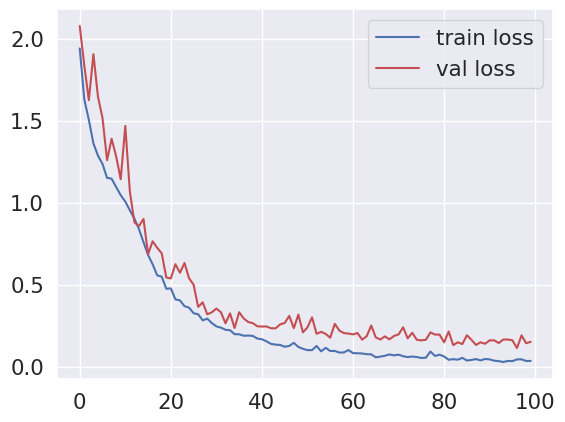

In [32]:
plt.plot(losses,'b')
plt.plot(val_losses,'r')
plt.legend(['train loss','val loss'])